In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [2]:
# 병합한 마케팅정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_마케팅정보_segment병합.csv')
df1

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,D
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E


### 기준년월, Segment별 고객 수

In [4]:
monthly_segment_customer_count = (
    df1.groupby(["기준년월", "Segment"])["ID"]
    .nunique()  # 고객 수 세기
    .unstack(fill_value=0)
)

display(monthly_segment_customer_count)

Segment,A,B,C,D,E
기준년월,,,,,
201807,162,24,21265,58207,320342
201808,162,24,21265,58207,320342
201809,162,24,21265,58207,320342
201810,162,24,21265,58207,320342
201811,162,24,21265,58207,320342
201812,162,24,21265,58207,320342


### 캠페인접촉

In [19]:
# 캠페인접촉건수
# 원하는 순서 지정
ordered_index = ['1회 이상', '5회 이상', '10회 이상', '15회 이상', '20회 이상', '25회 이상']

# 교차표 생성 (Segment × 캠페인접촉건수), 전치 및 정렬
count_table = (
    df1.groupby("Segment")["캠페인접촉건수_R12M"]
    .value_counts()
    .unstack(fill_value=0)     # 먼저 unstack하여 DataFrame으로 변환
    .T                          # 전치하여 보기 좋게
    .reindex(ordered_index)    # 여기서 순서 재정렬
)

display(count_table)

Segment,A,B,C,D,E
캠페인접촉건수_R12M,,,,,
1회 이상,779,103,98972,257538,1362203
5회 이상,107,29,14264,47049,313097
10회 이상,41,6,6361,19843,119906
15회 이상,35,0,4833,14376,77625
20회 이상,10,6,3160,10435,49217
25회 이상,0,0,0,1,4


In [39]:
# 캠페인 접촉건수 세그먼트별 비율
rate_table = pd.crosstab(
    df1["캠페인접촉건수_R12M"],
    df1["Segment"],
    normalize='columns'
).reindex(ordered_index)

display(rate_table)

Segment,A,B,C,D,E
캠페인접촉건수_R12M,,,,,
1회 이상,0.801440,0.715278,0.775703,0.737420,0.708723
5회 이상,0.110082,0.201389,0.111796,0.134717,0.162897
10회 이상,0.042181,0.041667,0.049855,0.056817,0.062384
15회 이상,0.036008,0.000000,0.037879,0.041163,0.040387
20회 이상,0.010288,0.041667,0.024767,0.029879,0.025606
25회 이상,0.000000,0.000000,0.000000,0.000003,0.000002


In [41]:
# 캠페인접촉일수
# 원하는 순서 지정
ordered_index2 = ['1일 이상', '5일 이상', '10일 이상', '15일 이상', '20일 이상']

# 교차표 생성 (Segment × 캠페인접촉건수), 전치 및 정렬
count_table2 = (
    df1.groupby("Segment")["캠페인접촉일수_R12M"]
    .value_counts()
    .unstack(fill_value=0)     # 먼저 unstack하여 DataFrame으로 변환
    .T                          # 전치하여 보기 좋게
    .reindex(ordered_index2)    # 여기서 순서 재정렬
)

display(count_table2)

Segment,A,B,C,D,E
캠페인접촉일수_R12M,,,,,
1일 이상,783,105,100793,262757,1390085
5일 이상,109,30,13563,45398,306506
10일 이상,44,3,6327,19414,115785
15일 이상,33,4,5486,16822,87450
20일 이상,3,2,1421,4851,22226


In [43]:
# 캠페인 접촉일수 세그먼트 비율
rate_table2 = pd.crosstab(
    df1["캠페인접촉일수_R12M"],
    df1["Segment"],
    normalize='columns'
).reindex(ordered_index2)

display(rate_table2)

Segment,A,B,C,D,E
캠페인접촉일수_R12M,,,,,
1일 이상,0.805556,0.729167,0.789976,0.752364,0.723230
5일 이상,0.112140,0.208333,0.106301,0.129990,0.159468
10일 이상,0.045267,0.020833,0.049589,0.055589,0.060240
15일 이상,0.033951,0.027778,0.042997,0.048167,0.045498
20일 이상,0.003086,0.013889,0.011137,0.013890,0.011564


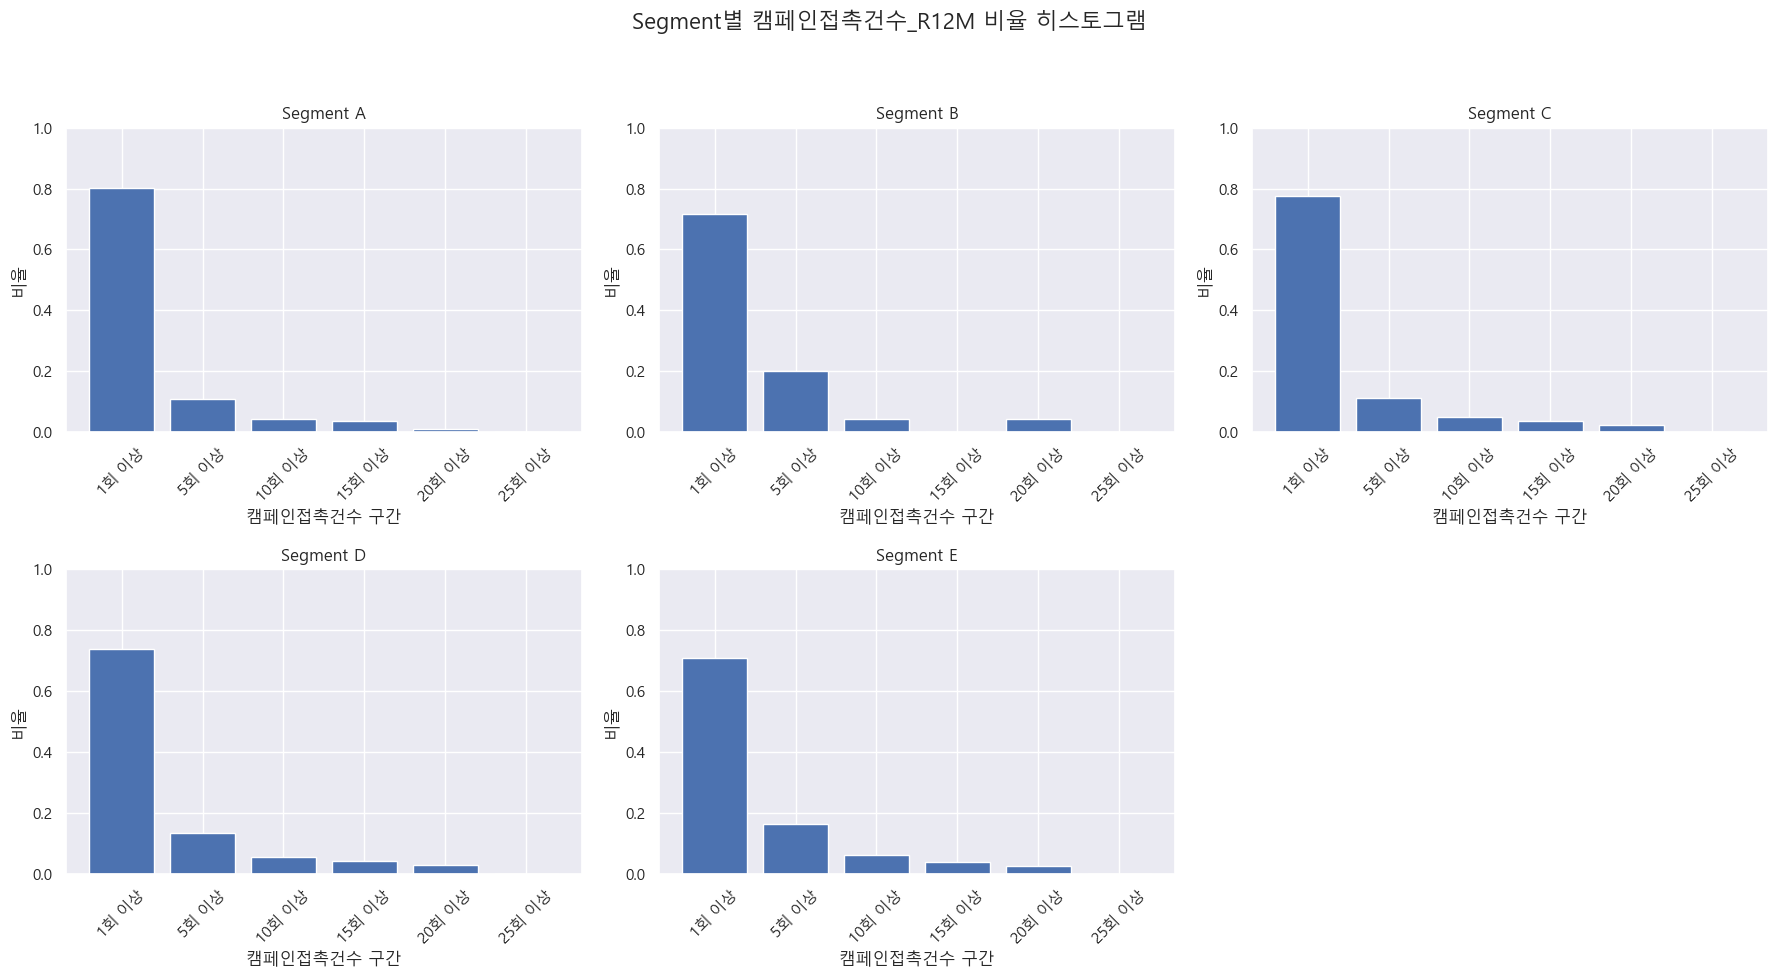

In [45]:
# 접촉건수
# 세그먼트 리스트 정의
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 설정 (3행 2열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 세그먼트별 히스토그램 생성
for i, seg in enumerate(segments):
    axes[i].bar(rate_table.index, rate_table[seg])
    axes[i].set_title(f"Segment {seg}")
    axes[i].set_xlabel("캠페인접촉건수 구간")
    axes[i].set_ylabel("비율")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 1)  # ✅ Y축 고정!
# 6번째 subplot은 빈칸으로
axes[-1].axis('off')

# 전체 타이틀 및 레이아웃 조정
plt.suptitle("Segment별 캠페인접촉건수_R12M 비율 히스토그램", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

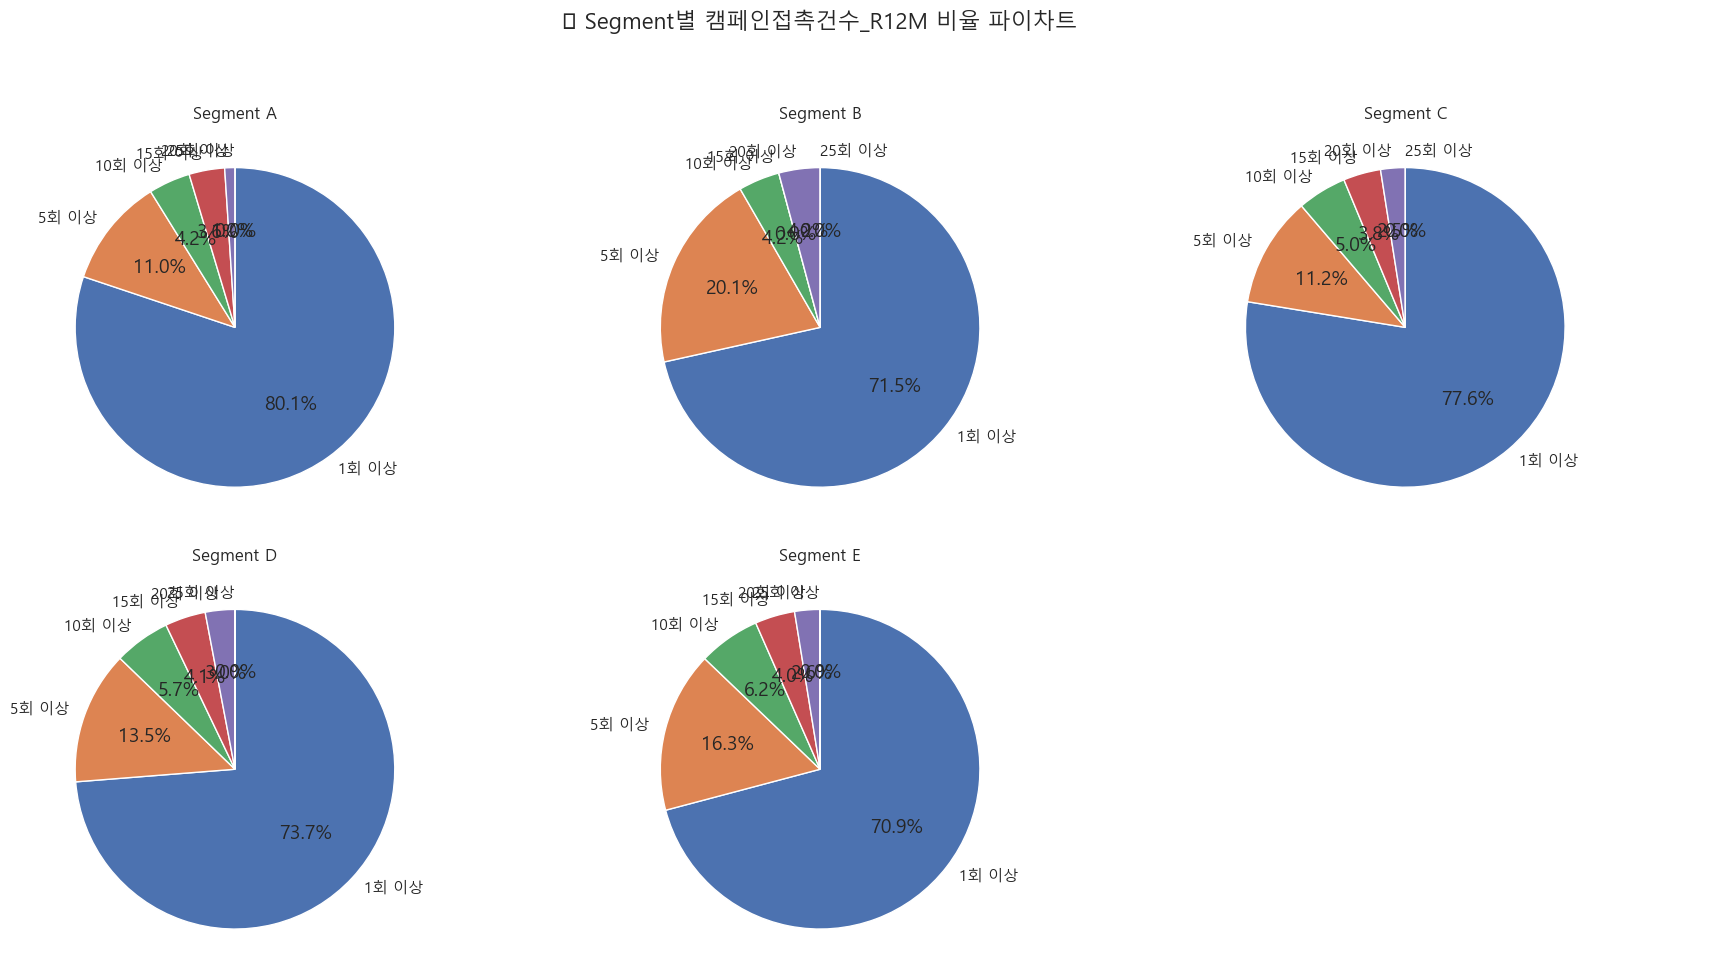

In [46]:
# 접촉건수
# 세그먼트 리스트 정의
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 세그먼트별 파이차트 생성
for i, seg in enumerate(segments):
    data = rate_table[seg]
    labels = rate_table.index.astype(str)
    
    axes[i].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}")

# 6번째 subplot은 비우기
axes[-1].axis('off')

# 전체 타이틀 및 레이아웃 조정
plt.suptitle("🥧 Segment별 캠페인접촉건수_R12M 비율 파이차트", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

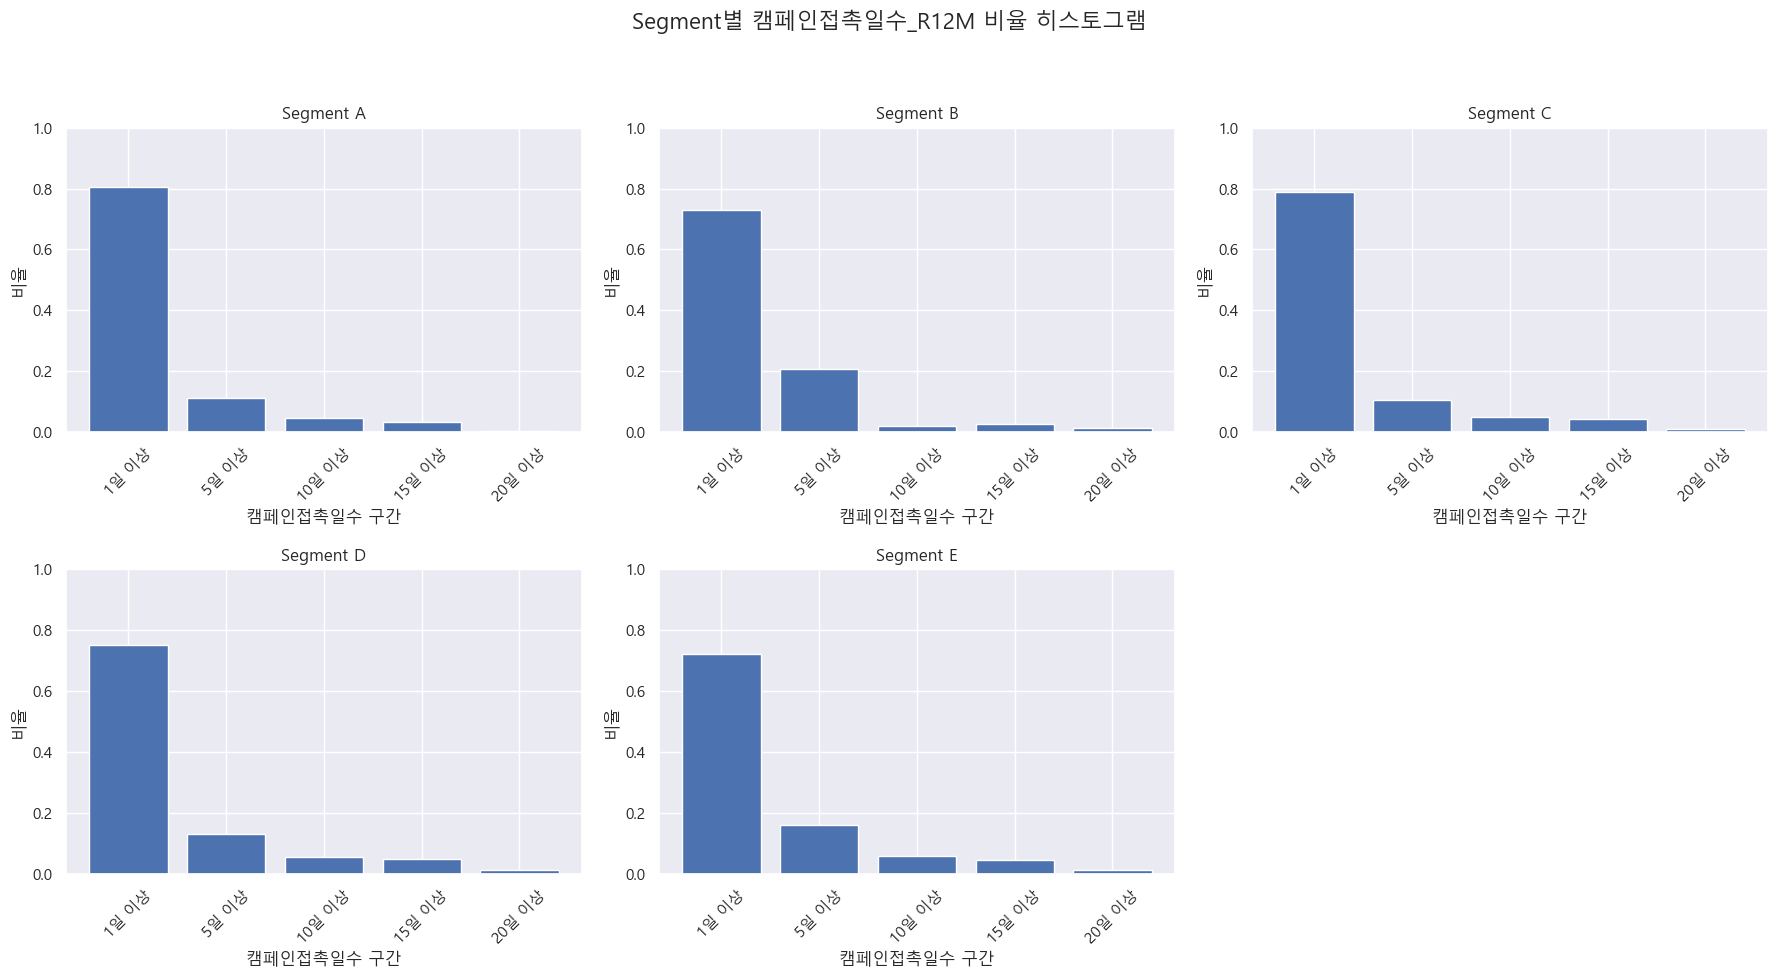

In [49]:
# 접촉일수
# 세그먼트 리스트 정의
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 설정 (3행 2열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 세그먼트별 히스토그램 생성
for i, seg in enumerate(segments):
    axes[i].bar(rate_table2.index, rate_table2[seg])
    axes[i].set_title(f"Segment {seg}")
    axes[i].set_xlabel("캠페인접촉일수 구간")
    axes[i].set_ylabel("비율")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 1)  # ✅ Y축 고정!
# 6번째 subplot은 빈칸으로
axes[-1].axis('off')

# 전체 타이틀 및 레이아웃 조정
plt.suptitle("Segment별 캠페인접촉일수_R12M 비율 히스토그램", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

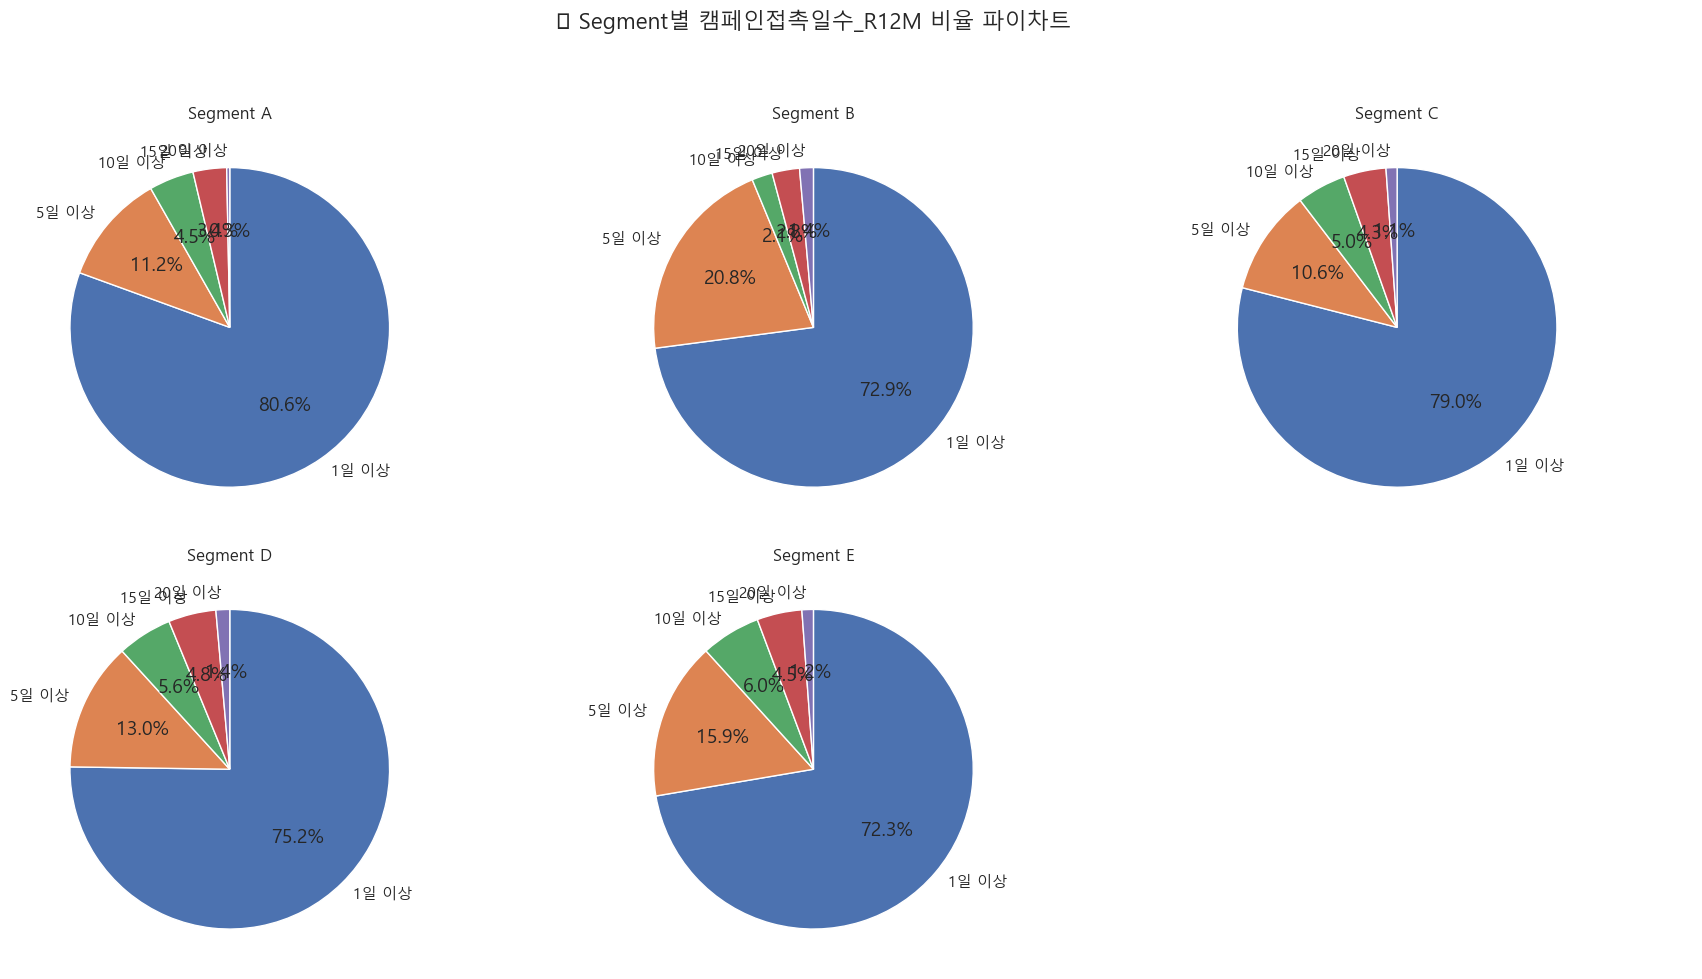

In [50]:
# 접촉일수
# 세그먼트 리스트 정의
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 세그먼트별 파이차트 생성
for i, seg in enumerate(segments):
    data = rate_table2[seg]
    labels = rate_table2.index.astype(str)
    
    axes[i].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}")

# 6번째 subplot은 비우기
axes[-1].axis('off')

# 전체 타이틀 및 레이아웃 조정
plt.suptitle("🥧 Segment별 캠페인접촉일수_R12M 비율 파이차트", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 상관관계 보자 - 범주형이니까 수치형변환

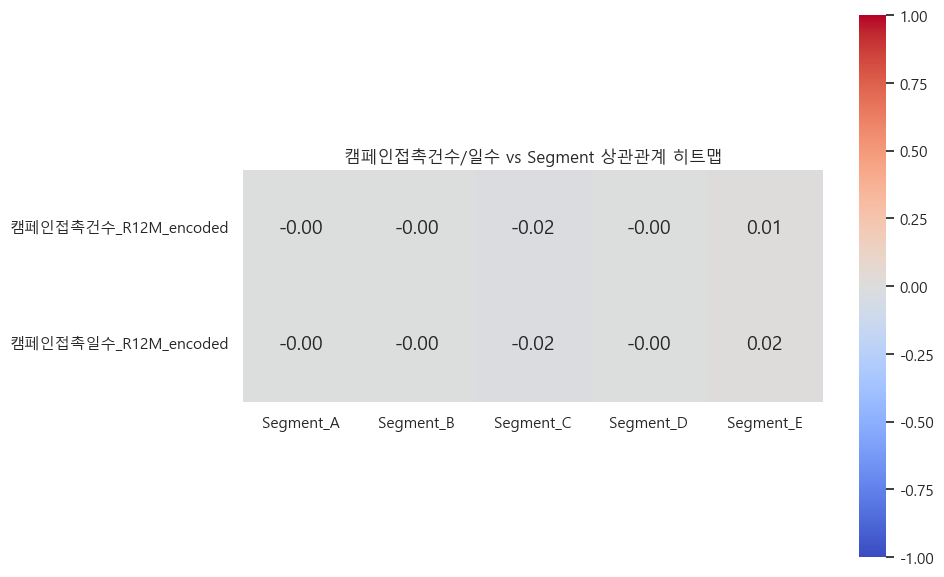

In [61]:
# 캠페인 관련 컬럼 (문자형 → 수치형으로 인코딩 필요)
bond_columns_raw = {
    "캠페인접촉건수_R12M": {
        "1회 이상": 1,
        "5회 이상": 5,
        "10회 이상": 10,
        "15회 이상": 15,
        "20회 이상": 20,
        "25회 이상": 25
    },
    "캠페인접촉일수_R12M": {
        "1일 이상": 1,
        "5일 이상": 5,
        "10일 이상": 10,
        "15일 이상": 15,
        "20일 이상": 20,
        "25일 이상": 25
    }
}

# 인코딩된 캠페인 컬럼 생성
for col, mapping in bond_columns_raw.items():
    df1[col + "_encoded"] = df1[col].map(mapping)

# 최종 사용할 컬럼 리스트
bond_columns = [col + "_encoded" for col in bond_columns_raw.keys()]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 분석용 데이터프레임 생성
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("캠페인접촉건수/일수 vs Segment 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 캠페인 접촉건수 해석 - 노출된 총 횟수 (같은 날 여러 번 포함 가능)
| Segment | 도달률      | 반복률 | 특징               |
| ------- | -------- | --- | ---------------- |
| **A**   | ⬆️ (80%) | ⬇️  | 한 번 접촉 후 반응 없음   |
| **B**   | ⬇️       | ⬆️  | 반복 접촉 강한 핵심 타겟   |
| **C**   | ⬆️       | ⬇️  | 기본형, 중간 포지션      |
| **D**   | ⬇️       | ⬆️  | 적절한 도달과 반복       |
| **E**   | ⬇️       | ⬆️  | 도달률 낮지만 반복 대응 가능 |

### 캠페인 접촉일수 해석 - 캠페인에 노출된 서로 다른 날짜 수
| Segment | 1일 이상 비율 | 해석                                                        |
| ------- | -------- | --------------------------------------------------------- |
| A       | 80.6%    | 전체 접촉 고객 중 **대부분이 1\~2일 사이에만 캠페인에 노출됨** → **짧은 노출로 끝남**   |
| B       | 72.9%    | 가장 낮음 → 즉, B는 **짧게 노출된 비중이 가장 낮고**, **오히려 반복 노출된 비중이 많음** |
| C       | 79.0%    | A와 유사하게 **짧은 기간에 대부분 노출**                                 |
| D       | 75.2%    | 중간 정도, 반복 노출도 있음                                          |
| E       | 72.3%    | B와 유사, 반복 접촉율 상대적으로 높음                                    |


### 제거할 컬럼 빼고 다시보기

In [130]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 리스트 (컨택건수 관련 전체)
contact_columns = [
    "컨택건수_보험_TM_R6M",
    "컨택건수_부대서비스_TM_R6M",
    "컨택건수_신용발급_TM_R6M"
]


# 2. Segment 필터링 (A~E)
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
contact_mean = df1_seg.groupby("Segment")[contact_columns].mean().T

# B0M, R6M으로 나누기
contact_mean_B0M = contact_mean[contact_mean.index.str.contains("_B0M")]
contact_mean_R6M = contact_mean[contact_mean.index.str.contains("_R6M")]

# 결과 출력
display(contact_mean_B0M)
display(contact_mean_R6M)

Segment,A,B,C,D,E


Segment,A,B,C,D,E
컨택건수_보험_TM_R6M,0.43107,0.64583,0.43520,0.44787,0.51614
컨택건수_부대서비스_TM_R6M,0.03395,0.15278,0.04638,0.05474,0.05654
컨택건수_신용발급_TM_R6M,0.00000,0.00000,0.00024,0.00081,0.01238


### 개별확인용 - 수치형을 평균으로 먼저봤다면 실제 데이터 형태를 확인해서 비교

In [146]:
df1['컨택건수_부대서비스_TM_R6M'].value_counts().sort_index()

컨택건수_부대서비스_TM_R6M
0    2333482
1          5
2      65773
3        740
Name: count, dtype: int64

In [148]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["컨택건수_부대서비스_TM_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_부대서비스_TM_R6M,0,1,2,3
Segment,,,,
A,956,0,15,1
B,133,0,11,0
C,124654,0,2890,46
D,339743,1,9379,119
E,1867996,4,53478,574


컨택건수_부대서비스_TM_R6M,0,1,2,3
Segment,,,,
A,0.98354,0.00000,0.01543,0.00103
B,0.92361,0.00000,0.07639,0.00000
C,0.97699,0.00000,0.02265,0.00036
D,0.97280,0.00000,0.02686,0.00034
E,0.97188,0.00000,0.02782,0.00030


In [ ]:
# # 조건에 맞는 데이터 필터링
# filtered_df = df1[(df1["Segment"] == "B") & (df1["컨택건수_이용유도_인터넷_B0M"] == 13)]

# # 결과 확인 (원하면 필요한 컬럼만 선택해도 됨)
# display(filtered_df)


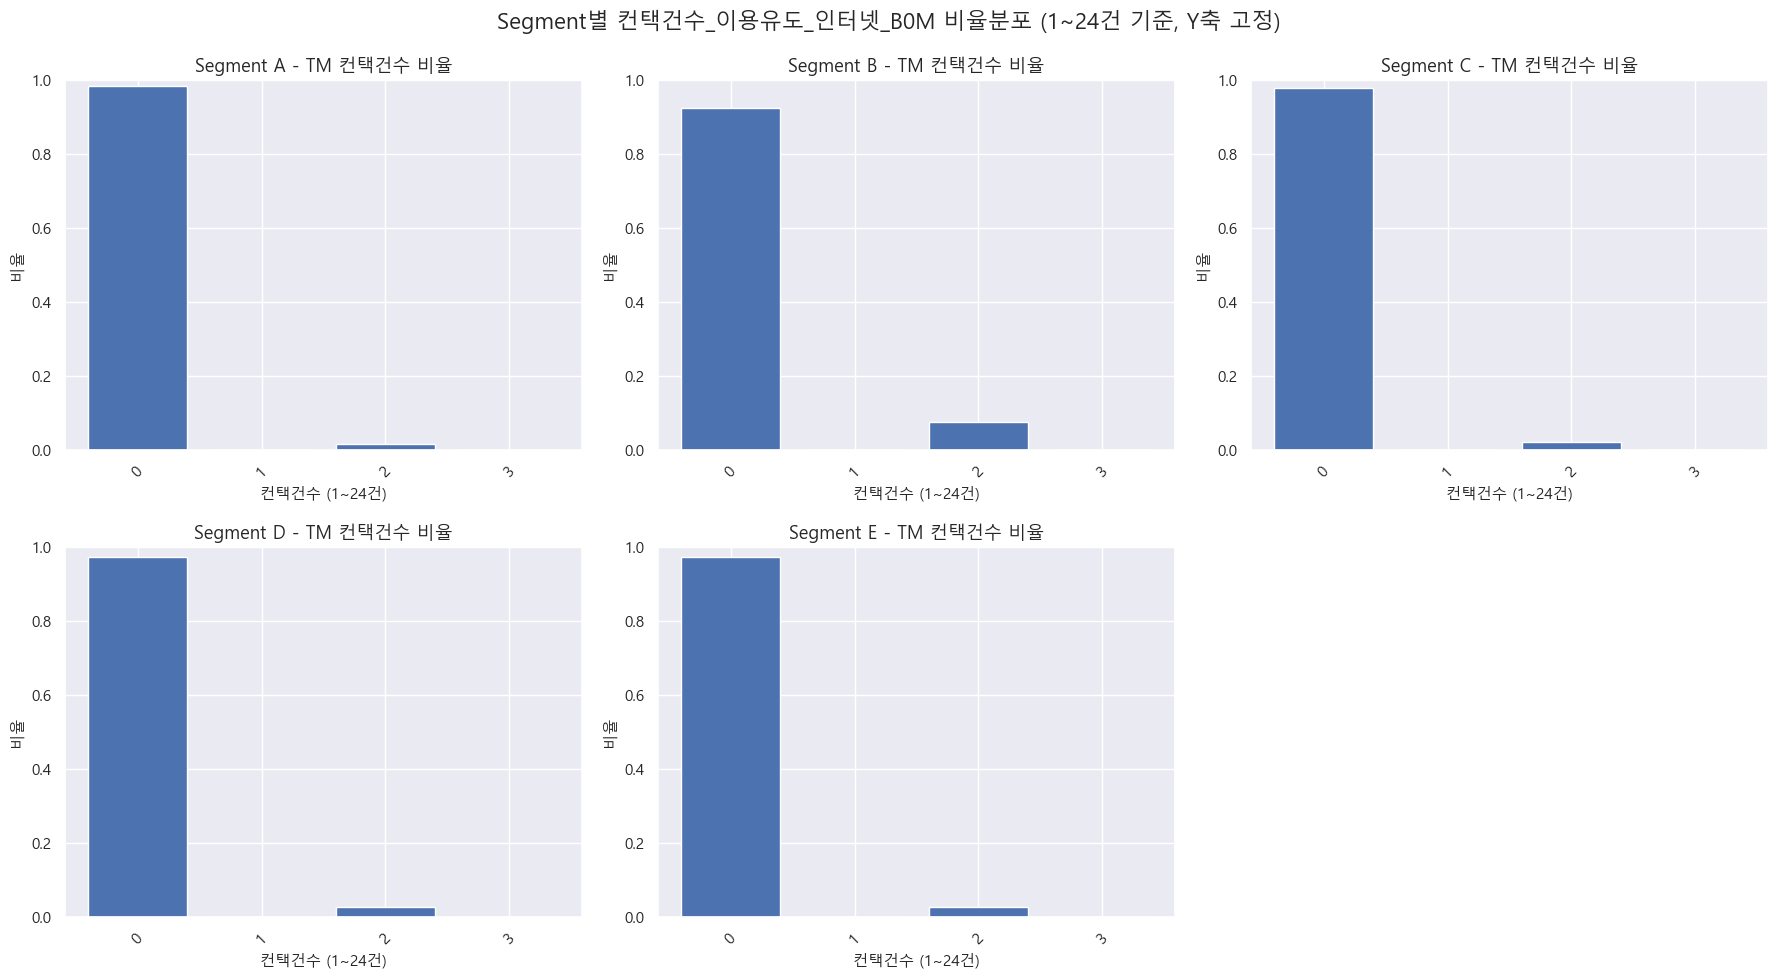

In [150]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:12]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()


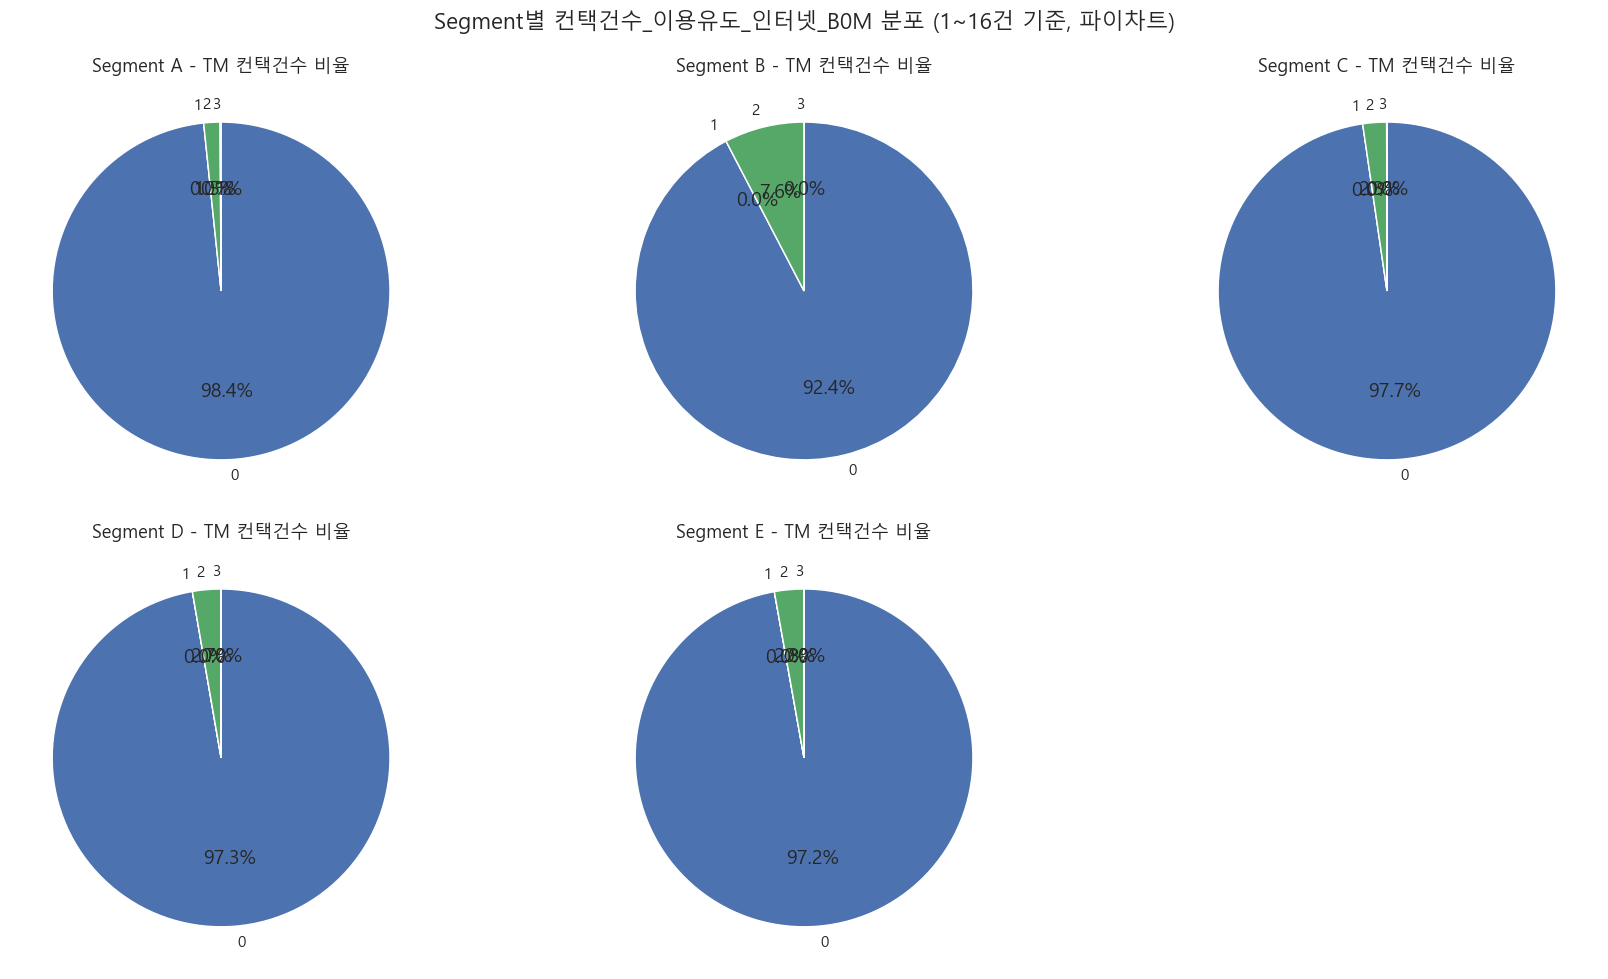

In [152]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:9]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 분포 (1~16건 기준, 파이차트)", fontsize=16)
plt.tight_layout()
plt.show()


### 상관관계 보자

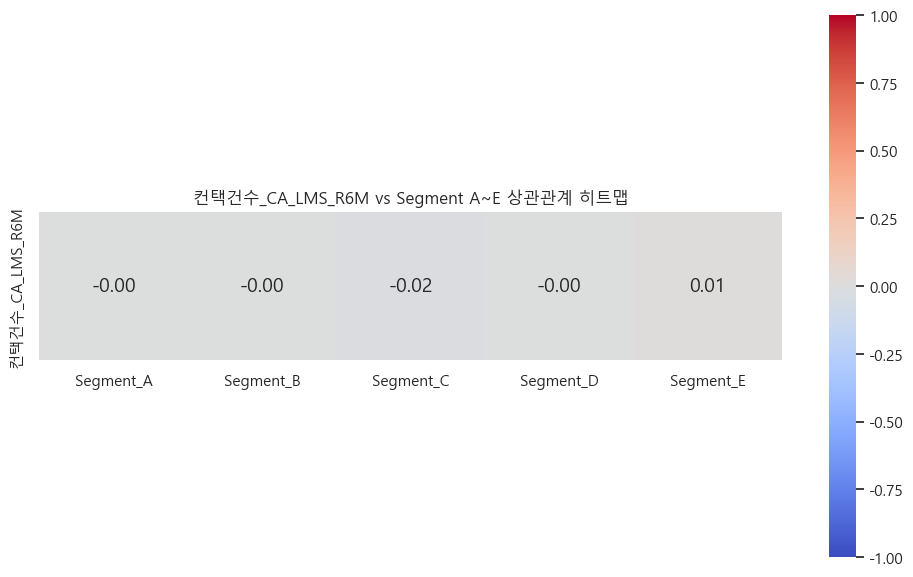

In [94]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "컨택건수_CA_LMS_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("컨택건수_CA_LMS_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

## ✅ Segment별 컨택채널 이용 평균 비교 (최근 6개월 기준)

### 🔍 주요 관찰 인사이트

1. **청구서 기반 컨택 (CA_청구서_R6M)**  
   - 전반적으로 모든 세그먼트에서 비교적 높은 수치를 보임  
   - 특히 A (0.247), B (0.208), D (0.237) Segment에서 뚜렷하게 높음 → **청구서 채널 활용 중요**

2. **LMS 채널 활용 (CA_LMS_R6M / 리볼빙_LMS_R6M)**  
   - 모든 세그먼트에서 CA_LMS_R6M 평균이 높음 (0.22~0.28 수준)  
   - 리볼빙_LMS_R6M은 비교적 낮음 (0.005~0.02) → **일반 LMS는 활발, 리볼빙 LMS는 제한적**

3. **TM 채널 (텔레마케팅)**  
   - 보험_TM_R6M은 압도적으로 높은 수치: A (0.431), B (0.645), C (0.435), D (0.478), E (0.611)  
   - 부대서비스_TM_R6M, 신용발급_TM_R6M 등도 상대적으로 높음 → **TM 채널은 보험/부가서비스에서 핵심적 역할**

4. **기타 채널**  
   - EM, 인터넷, 당사앱 채널은 전체적으로 **모든 세그먼트에서 거의 사용되지 않음 (0에 가까움)**  
   - CA_TM_R6M, 리볼빙_TM_R6M은 일부 세그먼트(A~C)에서만 사용 흔적 존재

---

### ✅ 전략 제안 요약

- **청구서 채널**을 기본 접점으로 유지하며, **보험/부가서비스 관련 TM 활용도 지속**
- **당사앱/인터넷/EM 채널 활성화 방안 필요** (현재 활용도 극히 낮음)
- **LMS는 일반공지 위주로 활용, 리볼빙 상품에선 비중 확대 가능성 검토**
